# Segementation Comparision



## Get Data and Labels

In [6]:
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt


In [5]:
files = os.listdir('processed_data')
# keep only npy files starting with 'warped'
files = [f for f in files if f.startswith('warped') and f.endswith('.npy')]
print('Found {} files'.format(len(files)))
files

Found 2 files


['warped_LLA4_LEFT_processed_segmentation_resampled_0.8x0.8x0.8_.npy',
 'warped_220214_brain3_LEFT_processed_segmentation_resampled_0.8x0.8x0.8_.npy']

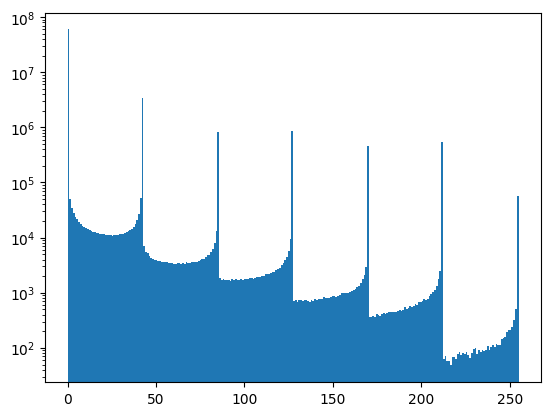

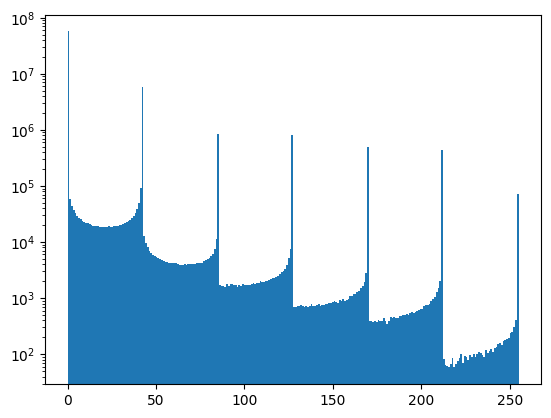

In [43]:
for i in range(len(files)):
    data = np.load('processed_data/' + files[i])
    hist = np.histogram(data.flatten(), bins=256)

    plt.hist(data.flatten(), bins=256)
    plt.yscale('log')
    plt.show()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

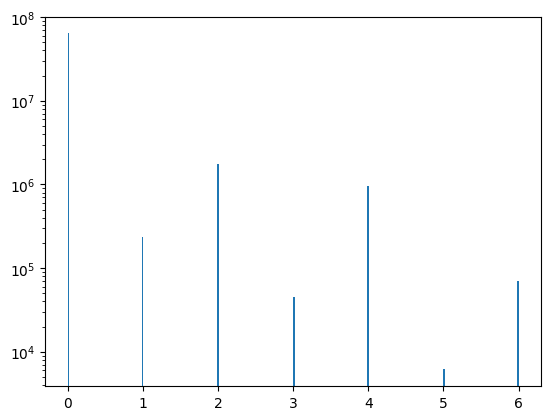

In [79]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(hist[0],threshold=1e3)
new_data = np.digitize(data, bins=np.linspace(0, 255, len(peaks)+2))-1
plt.hist(new_data.flatten(), bins=256)
plt.yscale('log')
plt.show()


In [ ]:
# save new data as nrrd
import nrrd

In [41]:
dist = np.cumsum(np.sort(hist[0])[::-1])/np.sum(hist[0])
diff_dist = np.diff(dist)
for i in range(1, 10):
    print(diff_dist[i], diff_dist[i-1])
    if diff_dist[i] < 0.1*diff_dist[i-1]:
        print('Found threshold: {}'.format(i))
        break

0.01292793562308936 0.051263411856380725
0.012120062338907944 0.01292793562308936
0.00805334771923516 0.012120062338907944
0.006869897500449529 0.00805334771923516
0.0008438080680932547 0.006869897500449529
0.0007904903194868584 0.0008438080680932547
0.0007587963795481212 0.0007904903194868584
0.0005226877659892937 0.0007587963795481212
0.00042760594617274883 0.0005226877659892937


In [2]:
data_dir = '../data/segmentation_data/test'
# get all the filenames
filenames = os.listdir(data_dir)
# keep only tif files
filenames = [f for f in filenames if f.endswith('.nrrd')]
# separate into images and labels
images = [os.path.join(data_dir, f) for f in filenames if 'segmentation' not in f]
labels = [os.path.join(data_dir, f) for f in filenames if 'segmentation' in f]
# create a matching list of pairs of images and labels
image_to_label = {}
label_to_image = {}
for image, label in itertools.product(images, labels):
    if os.path.splitext(image)[0] == os.path.splitext(label)[0].replace('_segmentation', ''):
        image_to_label[image] = label
        label_to_image[label] = image
# keep only the images that have a label
images = list(image_to_label.keys())
labels = list(image_to_label.values())

In [3]:
# Get the templates
template_dir = '../data/templates'
template_filenames = os.listdir(template_dir)
# keep only nrrd files
template_filenames = [f for f in template_filenames if f.endswith('.nrrd')]
print(template_filenames)

['obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd']


In [4]:
# target resolution
target_resolution = "0.8x0.8x0.8" # in microns
# get the template with the correct resolution in the name 
template_filename = [f for f in template_filenames if target_resolution in f]
assert len(template_filename) == 1, "There should be only one template with the target resolution"
template_filename = template_filename[0]
# template path
template_path = os.path.join(template_dir, template_filename)

In [5]:
processed_data_dir = 'processed_data'

In [6]:
# loop over the images and labels and check if names have LEFT or RIGHT in them
# if LEFT, mirror the image and label
# if RIGHT, do nothing

TARGET_DIRECTION = 'LEFT'

new_images = []
new_labels = []


for image in images:
    if ('RIGHT' if TARGET_DIRECTION == 'LEFT' else 'LEFT') in image:
        # mirror the image
        print("Mirroring image: " + image)
        # create a mirrored image at the processed data directory
        mirrored_image = os.path.join(processed_data_dir, os.path.basename(image).replace(('RIGHT' if TARGET_DIRECTION == 'LEFT' else 'LEFT'), TARGET_DIRECTION))
        # check if the image already exists
        if os.path.isfile(mirrored_image) or os.path.isfile(os.path.dirname(mirrored_image)+'/backup/'+os.path.basename(mirrored_image)):
            print("The mirrored image already exists. Skipping.")
            new_images.append(mirrored_image)
            continue
        reflection_matrix = os.path.join(processed_data_dir, os.path.basename(image)[:-5] + "_reflection_matrix.mat")
        # create the command
        flip_brain_command1 = "ImageMath 3 {} ReflectionMatrix {} 0".format(reflection_matrix, image)
        flip_brain_command2 = "WarpImageMultiTransform 3 {} {} -R {} {}".format(image, mirrored_image, image, reflection_matrix)
        # run the commands
        print(flip_brain_command1)
        # os.system(flip_brain_command1)
        os.system(flip_brain_command1)
        print(flip_brain_command2)
        # os.system(flip_brain_command2)
        os.system(flip_brain_command2)
        # change the image name to the mirrored image
        new_images.append(mirrored_image)
    else:
        # copy the image to the processed data directory
        print("Copying image: " + image)
        new_image = os.path.join(processed_data_dir, os.path.basename(image))
        # check if the image already exists
        if os.path.isfile(new_image) or os.path.isfile(os.path.dirname(new_image)+'/backup/'+os.path.basename(new_image)):
            print("The image already exists. Skipping.")
            new_images.append(new_image)
            continue
        # shutil.copyfile(image, new_image)
        os.system("cp {} {}".format(image, new_image))
        # change the image name to the copied image
        new_images.append(new_image)

for label in labels:
    if ('RIGHT' if TARGET_DIRECTION == 'LEFT' else 'LEFT') in label:
        # mirror the label
        print("Mirroring label: " + label)
        # create a mirrored label at the processed data directory
        mirrored_label = os.path.join(processed_data_dir, os.path.basename(label).replace(('RIGHT' if TARGET_DIRECTION == 'LEFT' else 'LEFT'), TARGET_DIRECTION))
        # check if the label already exists
        if os.path.isfile(mirrored_label) or os.path.isfile(os.path.dirname(mirrored_label)+'/backup/'+os.path.basename(mirrored_label)):
            print("The mirrored label already exists. Skipping.")
            new_labels.append(mirrored_label)
            continue
        reflection_matrix = os.path.join(processed_data_dir, os.path.basename(label)[:-5] + "_reflection_matrix.mat")
        # create the command
        flip_brain_command1 = "ImageMath 3 {} ReflectionMatrix {} 0".format(reflection_matrix, label)
        flip_brain_command2 = "WarpImageMultiTransform 3 {} {} -R {} {}".format(label, mirrored_label, label, reflection_matrix)
        # flip_brain_command2 = "antsApplyTransforms -d 3 -i {} -o {} -t {} -r {}".format(label, mirrored_label, reflection_matrix, label)
        # run the commands
        print(flip_brain_command1)
        # os.system(flip_brain_command1)
        os.system(flip_brain_command1)
        print(flip_brain_command2)
        # os.system(flip_brain_command2)
        os.system(flip_brain_command2)
        # change the label name to the mirrored label
        new_labels.append(mirrored_label)
    else:
        # copy the label to the processed data directory
        print("Copying label: " + label)
        new_label = os.path.join(processed_data_dir, os.path.basename(label))
        # check if the label already exists
        if os.path.isfile(new_label) or os.path.isfile(os.path.dirname(new_label)+'/backup/'+os.path.basename(new_label)):
            print("The label already exists. Skipping.")
            new_labels.append(new_label)
            continue
        # shutil.copyfile(label, new_label)
        os.system("cp {} {}".format(label, new_label))
        # change the label name to the copied label
        new_labels.append(new_label)

def run_commands(commands_to_run):
    for command in commands_to_run:
        # print(command)
        os.system(command)

Copying image: ../data/segmentation_data/training/201213_2-6_brain3_LEFT_processed.nrrd
The image already exists. Skipping.
Mirroring image: ../data/segmentation_data/training/201213_2-1_brain1_RIGHT_processed.nrrd
The mirrored image already exists. Skipping.
Copying image: ../data/segmentation_data/training/220216_brain10_LEFT_processed.nrrd
The image already exists. Skipping.
Copying label: ../data/segmentation_data/training/201213_2-6_brain3_LEFT_processed_segmentation.nrrd
The label already exists. Skipping.
Mirroring label: ../data/segmentation_data/training/201213_2-1_brain1_RIGHT_processed_segmentation.nrrd
The mirrored label already exists. Skipping.
Copying label: ../data/segmentation_data/training/220216_brain10_LEFT_processed_segmentation.nrrd
The label already exists. Skipping.


In [7]:
# resample all of the images
if not os.path.isdir("{}/backup".format(processed_data_dir)):
    # create the backup subdirectory
    command = "mkdir -p {}/backup".format(processed_data_dir)
    !{command}
    command = 'mv {}/*.nrrd {}/backup'.format(processed_data_dir, processed_data_dir)
    !{command}
    command = 'mv {}/*.mat {}/backup'.format(processed_data_dir, processed_data_dir)
    !{command}

In [8]:
n_jobs = os.listdir(processed_data_dir+'/backup')
# filter only nrrd files
n_jobs = [f for f in n_jobs if f.endswith('.nrrd')]
n_jobs = len(n_jobs)
n_cpu = os.cpu_count()
print("Number of jobs: {}".format(n_jobs))

Number of jobs: 6


In [9]:
command = f'poetry run python ../../scripts/resample.py -i {processed_data_dir+"/backup"} -o {processed_data_dir} -v {target_resolution} -n {min(n_jobs, n_cpu)}'
!{command}

Kronauer Lab - Microscopy Image Processing Pipeline
Confocal Resampler by Rishika Mohanta
Version 1.1.0

Output file processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Output file processed_data/220216_brain10_LEFT_processed_segmentation_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Output file processed_data/201213_2-1_brain1_LEFT_processed_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Output file processed_data/201213_2-6_brain3_LEFT_processed_segmentation_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Output file processed_data/220216_brain10_LEFT_processed_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Output file processed_data/201213_2-1_brain1_LEFT_processed_segmentation_resampled_0.8x0.8x0.8.nrrd already exists. Will be overwritten.
Resampling file 1 of 6
Target resolution: 0.8 μm x 0.8 μm x 0.8 μm
Log file: processed_data/201213_2-6_brain3_LEFT_pro

In [10]:
# add resampled_<target_resolution> to the filenames
new_images = [x.replace('.nrrd', '_resampled_{}.nrrd'.format(target_resolution)) for x in new_images]
new_labels = [x.replace('.nrrd', '_resampled_{}.nrrd'.format(target_resolution)) for x in new_labels]

In [11]:
images = new_images
labels = new_labels
# recreate a matching list of pairs of images and labels
image_to_label = {}
label_to_image = {}
for image, label in itertools.product(images, labels):
    if os.path.splitext(image)[0] == os.path.splitext(label)[0].replace('_segmentation', ''):
        image_to_label[image] = label
        label_to_image[label] = image
# keep only the images that have a label
images = list(image_to_label.keys())
labels = list(image_to_label.values())

In [12]:
images

['processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8.nrrd',
 'processed_data/201213_2-1_brain1_LEFT_processed_resampled_0.8x0.8x0.8.nrrd',
 'processed_data/220216_brain10_LEFT_processed_resampled_0.8x0.8x0.8.nrrd']

In [13]:
# loop over the images and register them to the template using ANTs
# loop over the images
for image in images:
    # generate output prefix
    output_prefix = os.path.basename(image).replace('.nrrd', '_')
    output_prefix = os.path.join(processed_data_dir, output_prefix)
    # check if files with this prefix already exist
    if os.path.isfile(output_prefix + 'Warped.nii.gz'):
        print("The registered image already exists. Skipping.")
        continue
    
    # convert template path to full path
    template_path_ = os.path.abspath(template_path)
    # convert image path to full path
    image_ = os.path.abspath(image)
    # convert output prefix to full path
    output_prefix_ = os.path.abspath(output_prefix)


    # create registration command
    command = f'antsIntroduction.sh -d 3 -r {template_path_} -i {image_} '
    command += f'-o {output_prefix_} -t GR -s CC -m 30x90x20x8 -n 1 -q 1 '
    command += f'>{output_prefix_}.log 2>{output_prefix_}.err'
    # add the command to the list of commands
    print(command)
    os.system(command)

antsIntroduction.sh -d 3 -r /media/DATA01/Rishika/ant_template_builder/verification/data/templates/obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd -i /media/DATA01/Rishika/ant_template_builder/verification/segmentation/processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8.nrrd -o /media/DATA01/Rishika/ant_template_builder/verification/segmentation/processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8_ -t GR -s CC -m 30x90x20x8 -n 1 -q 1 >/media/DATA01/Rishika/ant_template_builder/verification/segmentation/processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8_.log 2>/media/DATA01/Rishika/ant_template_builder/verification/segmentation/processed_data/201213_2-6_brain3_LEFT_processed_resampled_0.8x0.8x0.8_.err
antsIntroduction.sh -d 3 -r /media/DATA01/Rishika/ant_template_builder/verification/data/templates/obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd -i /media/DATA01/Rishika/ant_template_builder/verification/segmentation/processed_data/2012

In [ ]:
# loop over the labels and warp them to the template using the generated transforms during registration

for label in labels:
    # generate output prefix
    output_prefix = os.path.basename(label).replace('.nrrd', '_')
    output_prefix = processed_data_dir + '/warped_' + output_prefix
    # get the corresponding image
    image = label_to_image[label]
    # get the corresponding output prefix
    image_output_prefix = os.path.basename(image).replace('.nrrd', '_')
    image_output_prefix = processed_data_dir + '/' + image_output_prefix
    # convert template path to full path
    template_path_ = os.path.abspath(template_path)
    # convert label path to full path
    label_ = os.path.abspath(label)
    # convert output prefix to full path
    output_prefix_ = os.path.abspath(output_prefix)
    # convert image path to full path
    image_output_prefix_ = os.path.abspath(image_output_prefix)
    # create registration command
    command = f'WarpImageMultiTransform 3 {label_} {output_prefix_}segmented.nrrd -R {template_path_} '
    command += f'{image_output_prefix_}Warp.nii.gz {image_output_prefix_}Affine.txt '
    command += f'>{output_prefix_}.log 2>{output_prefix_}.err'
    # command = f'antsApplyTransforms -d 3 -i {label} -r {template_path}'
    # command += f' -o {output_prefix}.nrrd -n GenericLabel -t {image_output_prefix}1Warp.nii.gz'
    # command += f' -t {image_output_prefix}0GenericAffine.mat >{output_prefix}.log 2>{output_prefix}.err'
    # add the command to the list of commands
    print(command)
    os.system(command)


antsApplyTransforms -d 3 -i processed_data/201213_2-6_brain3_RIGHT_processed_segmentation.nrrd -r ../data/templates/obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd -o processed_data/warped_201213_2-6_brain3_RIGHT_processed_segmentation_.nrrd -n GenericLabel -t processed_data/201213_2-6_brain3_RIGHT_processed_1Warp.nii.gz -t processed_data/201213_2-6_brain3_RIGHT_processed_0GenericAffine.mat >processed_data/warped_201213_2-6_brain3_RIGHT_processed_segmentation_.log 2>processed_data/warped_201213_2-6_brain3_RIGHT_processed_segmentation_.err
antsApplyTransforms -d 3 -i processed_data/201213_2-1_brain1_RIGHT_processed_segmentation.nrrd -r ../data/templates/obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd -o processed_data/warped_201213_2-1_brain1_RIGHT_processed_segmentation_.nrrd -n GenericLabel -t processed_data/201213_2-1_brain1_RIGHT_processed_1Warp.nii.gz -t processed_data/201213_2-1_brain1_RIGHT_processed_0GenericAffine.mat >processed_data/warped_201213_2-1_brain1_RIGHT_processed_segmen

antsApplyTransforms -d 3 -i processed_data/220216_brain10_RIGHT_processed_segmentation.nrrd -r ../data/templates/obiroi_template_20231127_1647_0.8x0.8x0.8.nrrd -o processed_data/warped_220216_brain10_RIGHT_processed_segmentation_.nrrd -n GenericLabel -t processed_data/220216_brain10_RIGHT_processed_1Warp.nii.gz -t processed_data/220216_brain10_RIGHT_processed_0GenericAffine.mat >processed_data/warped_220216_brain10_RIGHT_processed_segmentation_.log 2>processed_data/warped_220216_brain10_RIGHT_processed_segmentation_.err


In [ ]:
# open the warped labels using pynrrd and save them as numpy arrays
import nrrd
import numpy as np

final_labels = []
final_labels_paths = []

# loop over the labels
for label in labels:
    # generate output prefix
    output_prefix = os.path.basename(label).replace('.nrrd', '_')
    output_prefix = processed_data_dir + '/warped_' + output_prefix
    # open the label using pynrrd
    label_data, label_header = nrrd.read(output_prefix + '.nrrd')
    final_labels.append(label_data)
    final_labels_paths.append(output_prefix + '.nrrd')

In [ ]:
# for each final label, sort the unique values map them to the values 0, 1, 2, ...
n_channels = []

for i, label in enumerate(final_labels):
    processed_label = label.copy()
    # get the unique values
    unique_values = np.unique(label)
    # sort the unique values
    unique_values.sort()
    # append the number of channels to the list
    n_channels.append(len(unique_values))
    # map the unique values to the values 0, 1, 2, ...
    for j, value in enumerate(unique_values):
        processed_label[label == value] = j
    # save the label as a numpy array
    np.save(final_labels_paths[i], label)

# assert that all the labels have the same number of channels
assert len(set(n_channels)) == 1, "All the labels should have the same number of channels"

# create the channel wise labels
channel_wise_labels = []
n_channels = n_channels[0]

# loop over the channels
for i in range(n_channels):
    channel_wise_labels.append([label == i for label in final_labels])

In [ ]:
def dice_volume(vol1, vol2):
    """
    Computes the Dice volume overlap between two volumes.
    """
    return 2 * np.sum(np.logical_and(vol1, vol2)) / (np.sum(vol1) + np.sum(vol2))

def pairwise_dice_volume(vols):
    """
    Computes the Dice volume overlap between all pairs of volumes.
    """
    n_vols = len(vols)
    dice_volumes = np.ones((n_vols, n_vols))*np.nan
    for i in range(n_vols):
        for j in range(i+1, n_vols):
            dice_volumes[i, j] = dice_volume(vols[i], vols[j])
    return dice_volumes

# compute the pairwise dice volume for each channel
dice_volumes = []
for channel in channel_wise_labels:
    dice_volumes.append(pairwise_dice_volume(channel))

# save the dice volumes
np.save(processed_data_dir + '/dice_volumes.npy', dice_volumes)

# compute the average dice volume for each channel
for i, channel in enumerate(dice_volumes):
    # remove the NaNs
    channel_ = channel[~np.isnan(channel)].flatten()
    # compute the statistics
    print('Channel {}'.format(i))
    print('==========')
    print("Average Dice volume: {:.2f}".format(np.mean(channel_)))
    print("Median Dice volume: {:.2f}".format(np.median(channel_)))
    print("95% CI: ({:.2f}, {:.2f})".format(np.percentile(channel_, 2.5), np.percentile(channel_, 97.5)))
    print("Min: {:.2f}".format(np.min(channel_)))
    print("Max: {:.2f}".format(np.max(channel_)))
    print("Std: {:.2f}".format(np.std(channel_)))
    print("")

print("Done!")